<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

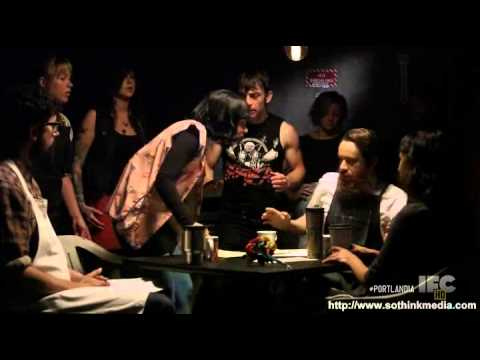

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [3]:
%pwd

'/home/primefactorx01/lambda/unit-04/sprint-01/module1-text-data'

In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"


shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [5]:
# Start here 

In [6]:
shops['star_rating_numeric'] = shops['star_rating'].str.extract('(\d*\.\d*)')
shops['star_rating_numeric'] = pd.to_numeric(shops['star_rating_numeric'])
shops['star_rating_numeric'].value_counts()

5.0    3780
4.0    2360
3.0     738
2.0     460
1.0     278
Name: star_rating_numeric, dtype: int64

In [7]:
shops['date'] = shops['full_review_text'].str.extract('(\d{1,2}\/\d{1,2}\/\d*)')
shops['date'] = pd.to_datetime(shops['date'])

In [8]:
import re

In [9]:
pattern = re.compile("(\d{1,2}\/\d{1,2}\/\d*) ")
shops['cleaned_review_text'] = shops['full_review_text'].str.replace(pattern, "")

0        1 check-in Love love loved the atmosphere! Ev...
1        Listed in Date Night: Austin, Ambiance in Aus...
2        1 check-in Listed in Brunch Spots I loved the...
3        Very cool decor! Good drinks Nice seating  Ho...
4        1 check-in They are located within the Northc...
                              ...                        
7611     I actually step into this restaurant by chanc...
7612     Ok, The Steeping Room IS awesome. How do they...
7613     Loved coming here for tea, and the atmosphere...
7614     The food is just average. The booths didn't f...
7615     I finally stopped in for lunch with my collea...
Name: full_review_text, Length: 7616, dtype: object

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [10]:
shops['great'] = [x >= 4 for x in shops['star_rating_numeric']]

In [11]:
import spacy
from spacy.tokenizer import Tokenizer

In [12]:

nlp = spacy.load("en_core_web_lg")

In [13]:
tokenizer = Tokenizer(nlp.vocab)

In [14]:
# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

In [25]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

def count_words(df, n = 10):
    tokens = []
    df = df.copy()

    """ Update those tokens w/o stopwords"""
    for doc in tokenizer.pipe(df['cleaned_review_text']):
        
        doc_tokens = []

        STOP_WORDS = nlp.Defaults.stop_words.union({' ', 'coffee', 'place', '1', 'check-in', "i'm", "it's", "i've", "austin"})
        
        for token in doc:
            if (token.lemma_.lower() not in STOP_WORDS) & (token.is_punct == False):
                doc_tokens.append(token.text.lower())

        tokens.append(doc_tokens)

    df['tokens'] = tokens


    wc = count(df['tokens'])

    wc_top = wc[wc['rank'] <= n]

    squarify.plot(sizes=wc_top['pct_total'], label=wc_top['word'], alpha=.8 )
    plt.axis('off')
    plt.show()
    return wc_top

## Top 10 word counds for all reviews

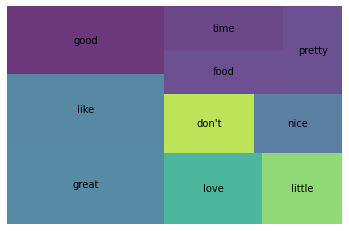

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
130,great,2438,3250,1.0,0.008840,0.008840,0.320116
185,like,2034,2902,2.0,0.007893,0.016733,0.267069
177,good,2084,2779,3.0,0.007559,0.024292,0.273634
27,love,1434,1806,4.0,0.004912,0.029204,0.188288
781,little,1230,1479,5.0,0.004023,0.033227,0.161502
309,don't,1133,1395,6.0,0.003794,0.037021,0.148766
162,nice,1188,1368,7.0,0.003721,0.040742,0.155987
475,food,1092,1363,8.0,0.003707,0.044449,0.143382
594,time,1099,1345,9.0,0.003658,0.048108,0.144301
24,pretty,1066,1339,10.0,0.003642,0.051750,0.139968


In [16]:
count_words(shops, 10)

### Top 10 words by score
#### 5 star

In [17]:
from IPython.display import display, HTML

Score: 1


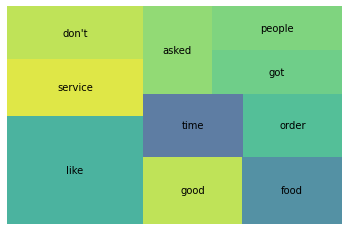

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
146,like,100,163,1.0,0.010397,0.010397,0.359712
67,service,68,86,2.0,0.005486,0.015883,0.244604
18,don't,68,80,3.0,0.005103,0.020986,0.244604
51,good,63,75,4.0,0.004784,0.025770,0.226619
106,food,50,75,5.0,0.004784,0.030554,0.179856
336,time,49,70,6.0,0.004465,0.035019,0.176259
105,order,45,69,7.0,0.004401,0.039421,0.161871
426,asked,53,68,8.0,0.004338,0.043758,0.190647
380,got,56,65,9.0,0.004146,0.047905,0.201439
258,people,46,63,10.0,0.004019,0.051923,0.165468




Score: 2


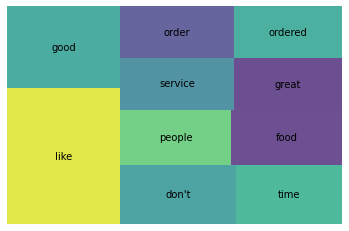

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
35,like,178,279,1.0,0.010697,0.010697,0.386957
27,good,134,169,2.0,0.006479,0.017176,0.291304
196,don't,103,125,3.0,0.004792,0.021968,0.223913
338,time,85,114,4.0,0.004371,0.026339,0.184783
173,people,88,113,5.0,0.004332,0.030671,0.191304
587,food,69,112,6.0,0.004294,0.034965,0.150000
33,service,83,108,7.0,0.004141,0.039106,0.180435
171,order,71,107,8.0,0.004102,0.043208,0.154348
60,great,83,102,9.0,0.003911,0.047119,0.180435
317,ordered,76,102,10.0,0.003911,0.051029,0.165217




Score: 3


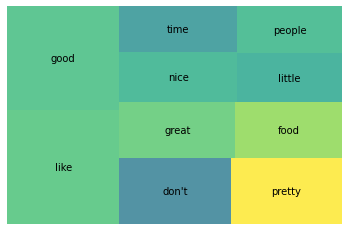

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
150,like,270,392,1.0,0.009747,0.009747,0.365854
67,good,244,355,2.0,0.008827,0.018574,0.330623
162,don't,169,225,3.0,0.005595,0.024169,0.228997
19,pretty,166,224,4.0,0.005570,0.029739,0.224932
110,great,147,198,5.0,0.004923,0.034662,0.199187
144,food,147,182,6.0,0.004525,0.039187,0.199187
386,nice,150,181,7.0,0.004501,0.043688,0.203252
191,time,130,167,8.0,0.004152,0.047840,0.176152
240,little,127,157,9.0,0.003904,0.051744,0.172087
410,people,113,151,10.0,0.003755,0.055499,0.153117




Score: 4


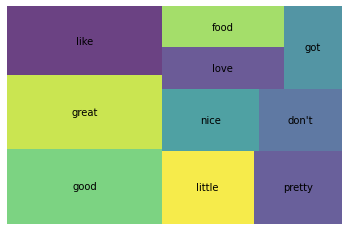

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
264,good,765,1056,1.0,0.008570,0.008570,0.324153
94,great,783,1037,2.0,0.008416,0.016985,0.331780
214,like,689,966,3.0,0.007839,0.024825,0.291949
730,little,489,606,4.0,0.004918,0.029743,0.207203
12,pretty,447,585,5.0,0.004747,0.034490,0.189407
180,nice,478,551,6.0,0.004472,0.038962,0.202542
249,don't,368,467,7.0,0.003790,0.042751,0.155932
14,love,371,459,8.0,0.003725,0.046476,0.157203
459,food,377,456,9.0,0.003701,0.050177,0.159746
172,got,343,436,10.0,0.003538,0.053715,0.145339




Score: 5


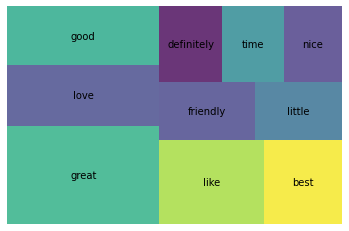

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
376,great,1391,1865,1.0,0.011480,0.011480,0.367989
27,love,892,1145,2.0,0.007048,0.018528,0.235979
96,good,878,1124,3.0,0.006919,0.025447,0.232275
173,like,797,1102,4.0,0.006783,0.032231,0.210847
58,best,713,817,5.0,0.005029,0.037260,0.188624
361,friendly,666,684,6.0,0.004210,0.041470,0.176190
224,little,538,624,7.0,0.003841,0.045311,0.142328
172,definitely,522,593,8.0,0.003650,0.048962,0.138095
176,time,504,588,9.0,0.003619,0.052581,0.133333
188,nice,484,550,10.0,0.003386,0.055967,0.128042


In [18]:
for i in range(1,6):
    print("Score: " + str(i))
    wc = count_words(shops[shops['star_rating_numeric'] == i].copy())
    display(wc)
    print("\n==============================\n")

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


great: True


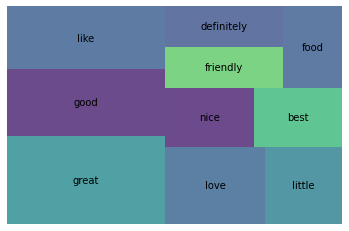

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
130,great,2174,2902,1.0,0.010158,0.010158,0.354072
295,good,1643,2180,2.0,0.007631,0.017789,0.267590
245,like,1486,2068,3.0,0.007239,0.025028,0.242020
27,love,1263,1604,4.0,0.005615,0.030643,0.205700
594,little,1027,1230,5.0,0.004306,0.034948,0.167264
214,nice,962,1101,6.0,0.003854,0.038802,0.156678
361,best,951,1093,7.0,0.003826,0.042628,0.154886
167,friendly,986,1014,8.0,0.003549,0.046178,0.160586
59,definitely,889,1002,9.0,0.003507,0.049685,0.144788
450,food,826,994,10.0,0.003479,0.053165,0.134528




great: False


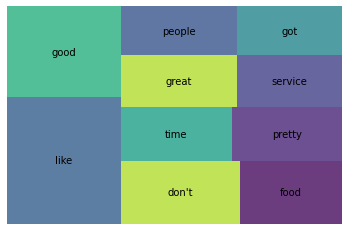

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
35,like,548,834,1.0,0.010174,0.010174,0.371274
27,good,441,599,2.0,0.007307,0.017481,0.298780
190,don't,340,430,3.0,0.005245,0.022726,0.230352
173,food,266,369,4.0,0.004501,0.027227,0.180217
219,time,264,351,5.0,0.004282,0.031509,0.178862
55,pretty,278,349,6.0,0.004257,0.035766,0.188347
140,great,264,348,7.0,0.004245,0.040011,0.178862
521,people,247,327,8.0,0.003989,0.044000,0.167344
33,service,261,314,9.0,0.003830,0.047830,0.176829
4,got,237,300,10.0,0.003660,0.051490,0.160569


In [19]:
for i in [True, False]:
    print("great: " + str(i))
    wc = count_words(shops[shops['great'] == i].copy())
    display(wc)
    print("\n==============================\n")

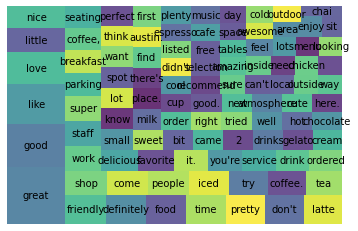

In [35]:
great_words = count_words(shops[shops['great'] == True].copy(), 100)
great_words_set = set(great_words['word'])


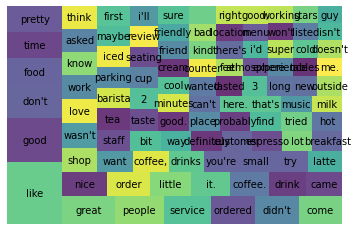

In [36]:
bad_words = count_words(shops[shops['great'] == False].copy(), 100)
bad_words_set = set(bad_words['word'])



In [37]:
# Words that exist in both sets.
matching_words = bad_words_set.intersection(great_words_set)

In [56]:

word_list = []
for word in list(matching_words):
    word
    g = great_words[great_words["word"] == word]["appears_in_pct"].values[0]
    b = bad_words[bad_words["word"] == word]["appears_in_pct"].values[0]
    entry = (word, g, b, abs(g-b))
    word_list.append(entry)

print(word_list)



[('feel', 0.058957654723127036, 0.07181571815718157, 0.012858063434054538), ('coffee,', 0.10439739413680782, 0.11178861788617886, 0.00739122374937104), ('time', 0.13599348534201955, 0.17886178861788618, 0.04286830327586663), ('coffee.', 0.11530944625407166, 0.13008130081300814, 0.014771854558936481), ('bit', 0.0770358306188925, 0.08943089430894309, 0.012395063690050584), ("there's", 0.06856677524429967, 0.07046070460704607, 0.001893929362746391), ('want', 0.07980456026058631, 0.1111111111111111, 0.03130655085052479), ('little', 0.16726384364820848, 0.1375338753387534, 0.029729968309455096), ('lot', 0.08371335504885993, 0.09078590785907859, 0.007072552810218652), ('atmosphere', 0.0736156351791531, 0.07384823848238482, 0.00023260330323172929), ("don't", 0.12915309446254072, 0.23035230352303523, 0.10119920906049451), ('iced', 0.10912052117263844, 0.07926829268292683, 0.029852228489711613), ('menu', 0.057003257328990226, 0.05894308943089431, 0.0019398321019040848), ('know', 0.0819218241042

In [60]:
from pprint import pprint

word_list = sorted(word_list, key=lambda word: word[3], reverse=True)

In [61]:
pprint(word_list)

[('great', 0.354071661237785, 0.17886178861788618, 0.17520987261989882),
 ('like', 0.24201954397394138, 0.3712737127371274, 0.12925416876318602),
 ("don't", 0.12915309446254072, 0.23035230352303523, 0.10119920906049451),
 ('love', 0.20570032573289904, 0.11585365853658537, 0.08984666719631366),
 ('service', 0.09397394136807817, 0.17682926829268292, 0.08285532692460475),
 ("didn't", 0.06889250814332247, 0.15040650406504066, 0.0815139959217182),
 ('friendly', 0.16058631921824104, 0.08062330623306233, 0.07996301298517872),
 ('ordered', 0.08306188925081433, 0.16260162601626016, 0.07953973676544583),
 ('definitely', 0.14478827361563518, 0.08265582655826559, 0.06213244705736959),
 ('pretty', 0.12833876221498372, 0.18834688346883469, 0.060008121253850966),
 ('order', 0.06840390879478828, 0.11788617886178862, 0.049482270067000345),
 ('it.', 0.09153094462540716, 0.1375338753387534, 0.04600293071334623),
 ('food', 0.13452768729641693, 0.1802168021680217, 0.045689114871604763),
 ('came', 0.0770358

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

